In [1]:
import scanpy as sc
import os
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import logging
from scipy.sparse import issparse
import anndata as adt
#import celltypist
#from celltypist import models

In [2]:
import warnings
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", RuntimeWarning)

In [3]:
path_dir_folder_processed_data = '/home/ybeaumatin/Documents/Data processing pipeline/scRNA/Output/processed_data'

In [4]:
adatas = [sc.read_h5ad(path_dir_folder_processed_data + '/' + x) for x in os.listdir(path_dir_folder_processed_data)]

In [5]:
adata = adt.concat(adatas, axis=0, join="outer", index_unique="-")

In [6]:
scales_counts = sc.pp.normalize_total(adata, target_sum=None, inplace=False)
# log1p transform
adata.layers["log1p_norm"] = sc.pp.log1p(scales_counts["X"], copy=True)

In [ ]:
#could be using Pearson too

In [ ]:
analytic_pearson = sc.experimental.pp.normalize_pearson_residuals(adata, inplace=False)
adata.layers["analytic_pearson_residuals"] = csr_matrix(analytic_pearson["X"])

In [7]:
os.makedirs('/home/ybeaumatin/Documents/Data processing pipeline/scRNA/Output/normalized_data', exist_ok = True)

In [9]:
file_path = os.path.join('/home/ybeaumatin/Documents/Data processing pipeline/scRNA/Output/normalized_data', f'adata_concat.h5ad')
adata.write(file_path)
print(f"Saved: {file_path}")

Saved: /home/ybeaumatin/Documents/Data processing pipeline/scRNA/Output/normalized_data/adata_concat.h5ad


In [ ]:
#Feature selection using R with Determination Highly var genes R

In [ ]:
path_file_data_highly_var = '/home/ybeaumatin/Documents/Data processing pipeline/scRNA/Output/Highly_var/adata_higly_var.h5ad'

In [ ]:
adata = sc.read_h5ad(path_file_data_highly_var)

In [7]:
normalized_layer = 'log1p_norm'

In [8]:
sc.pp.highly_variable_genes(adata, layer = normalized_layer)

In [ ]:
ax = sns.scatterplot(
    data=adata.var, x="means", y="dispersions", hue="highly_deviant", s=5
)
ax.set_xlim(None, 1.5)
ax.set_ylim(None, 3)
plt.show()

In [ ]:
#Dimensionality reduction

In [9]:
adata.X = adata.layers["log1p_norm"]

In [ ]:
#PCA
adata.var["highly_variable"] = adata.var["highly_deviant"]
sc.pp.pca(adata, svd_solver="arpack", use_highly_variable=True)

In [ ]:
sc.pl.pca_scatter(adata, color="total_counts")

In [ ]:
#t-SNE
sc.tl.tsne(adata, use_rep="X_pca")

In [ ]:
sc.pl.tsne(adata, color="total_counts")

In [10]:
#UMAPS
sc.pp.neighbors(adata)
sc.tl.umap(adata)

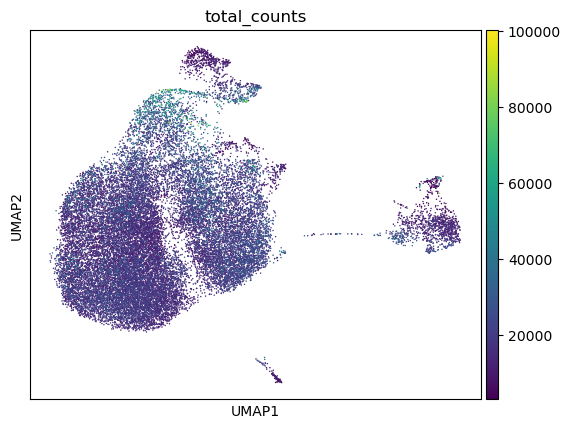

In [11]:
sc.pl.umap(adata, color="total_counts")

In [ ]:
#Genes high Var
sc.pl.pca_variance_ratio(adata, log=True) # put it at the right place, see the most variable genes

In [10]:
#Mapping
%matplotlib inline
sc.pp.neighbors(adata, n_pcs=30) #adapter le nombre selon valeur coude trouve avec PCA
sc.tl.umap(adata)

In [12]:
sc.tl.leiden(adata, resolution = 2, key_added = 'overcluster')

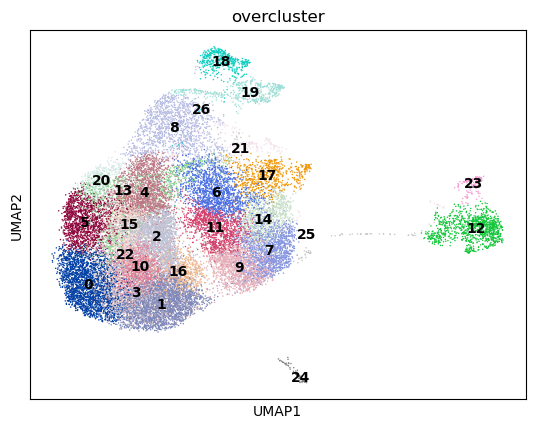

In [13]:
sc.pl.umap(
    adata,
    color=['overcluster'],
    legend_loc="on data",
)


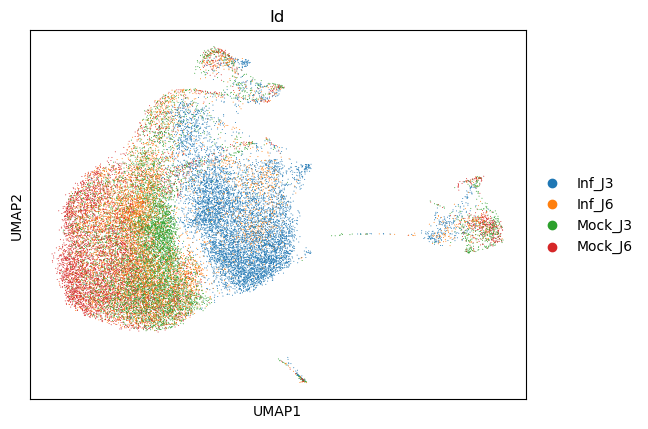

In [14]:
np.random.seed(1)
ri = np.random.permutation(list(range(adata.shape[0])))

sc.pl.umap(adata[ri,:], color = ['Id'], vmin = .5, size = 2)

In [15]:
adata.obs

,Id,n_genes,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,pct_counts_mt,pct_counts_ribo,pct_counts_hb,doublet_dbd,doublet_score_dbd
AAACAAGCAGCTCGCTATGTTGAC-1-Inf_J6-0,Inf_J6,4730,4730,8.461892,14274.0,9.566265,18.775396,0.175144,0.0,0.0,0.0,3.213993e-08
AAACCAATCACCTAATATGTTGAC-1-Inf_J6-0,Inf_J6,8415,8415,9.037890,54307.0,10.902427,19.159593,0.252270,0.0,0.0,1.0,9.044252e+01
AAACCAATCATTATGCATGTTGAC-1-Inf_J6-0,Inf_J6,5073,5073,8.531885,18919.0,9.847975,29.494159,0.190285,0.0,0.0,0.0,6.683431e-15
AAACCAATCCAAATTCATGTTGAC-1-Inf_J6-0,Inf_J6,5398,5398,8.593969,14307.0,9.568574,6.304606,0.146781,0.0,0.0,0.0,1.542882e-13
AAACCAATCGAAATGCATGTTGAC-1-Inf_J6-0,Inf_J6,5514,5514,8.615227,20776.0,9.941602,24.234694,0.096265,0.0,0.0,0.0,1.223419e-08
...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGAGTGCTTCTCACTTTAGG-1-Mock_J3-3,Mock_J3,5019,5019,8.521185,19508.0,9.878632,31.674185,0.082018,0.0,0.0,0.0,4.309988e-06
TTTGTGAGTGTCCAATACTTTAGG-1-Mock_J3-3,Mock_J3,6772,6772,8.820699,32117.0,10.377172,22.947349,0.059159,0.0,0.0,1.0,1.501787e+02
TTTGTGAGTTGGTTACACTTTAGG-1-Mock_J3-3,Mock_J3,5841,5841,8.672828,22521.0,10.022248,16.118290,0.182052,0.0,0.0,0.0,4.484287e-02
TTTGTGAGTTGTGACTACTTTAGG-1-Mock_J3-3,Mock_J3,4514,4514,8.415160,12620.0,9.443117,14.817750,0.142631,0.0,0.0,0.0,5.845924e-20


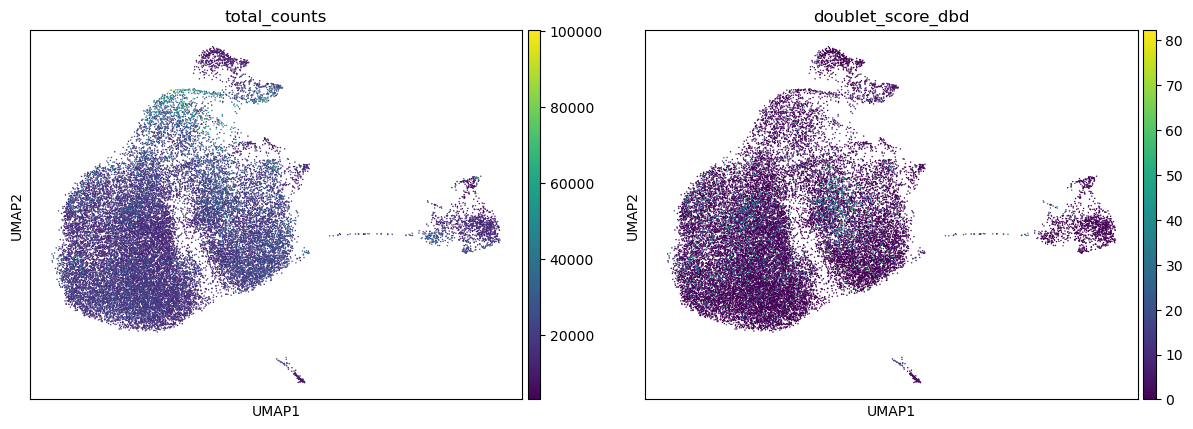

In [16]:
sc.pl.umap(
    adata,
    color=["total_counts",  "doublet_score_dbd"],
)


In [ ]:
adata.obs